In [17]:
import numpy as np
import pandas as pd

In [18]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [19]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [20]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [21]:
returns=returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [22]:
returns.columns = ['SmallCap','LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


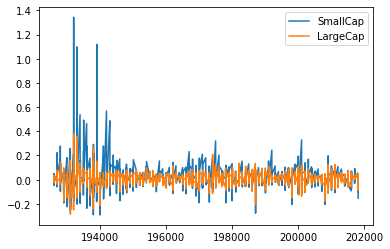

In [23]:
returns.plot.line()

In [24]:
%matplotlib inline

In [25]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [26]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [27]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months)-1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [28]:
annua_return = (return_per_month+1)**12-1
annua_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [29]:
annua_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [30]:
riskfree_rate = 0.03
excessReturn = annua_return-riskfree_rate
sharp_ratio = excessReturn/annualized_vol
sharp_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [31]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [32]:
returns.index = pd.to_datetime(returns.index, format = "%Y%m")

In [33]:
returns.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [36]:
returns.index = returns.index.to_period("M")
returns.head()


AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [37]:
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [24]:
returns['1998']

,SmallCap,LargeCap
1998-01,0.0324,0.0089
1998-02,0.0473,0.0767
1998-03,0.0509,0.0549
1998-04,0.0422,0.0123
1998-05,-0.0397,-0.0222
1998-06,-0.0490,0.0304
1998-07,-0.0498,-0.0126
1998-08,-0.2050,-0.1508
1998-09,0.0062,0.0680
1998-10,0.0134,0.0919


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown-which is the wealth value as a percentage of the previous peak


In [33]:
wealth_index = 1000*(1+returns["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

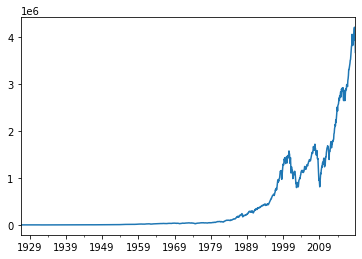

In [28]:
wealth_index.plot.line()

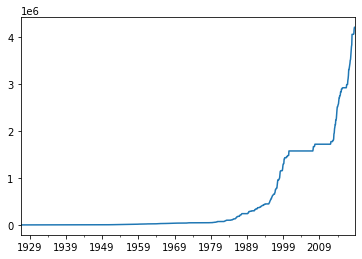

In [34]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

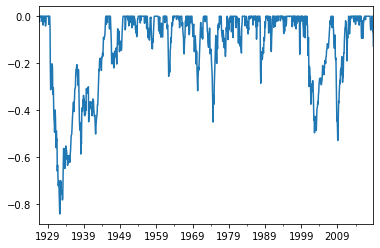

In [36]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [37]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [38]:
drawdown.min()

-0.8400375277943123

In [42]:
print(drawdown['1975':].idxmin(),drawdown['1975':].min())

2009-02 -0.5280945042309304


In [43]:
drawdown.idxmin()

Period('1932-05', 'M')

In [46]:
def drawdown(returns_series: pd.Series):
    """
    takes a times series od asset returns
    Computes and returns a DF that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [59]:
DD=drawdown(returns['LargeCap'])

In [60]:
DD[["Wealth","Peaks"]]

,Wealth,Peaks
1926-07,1.032900e+03,1.032900e+03
1926-08,1.071117e+03,1.071117e+03
1926-09,1.078294e+03,1.078294e+03
1926-10,1.052091e+03,1.078294e+03
1926-11,1.080498e+03,1.080498e+03
...,...,...
2018-08,4.175915e+06,4.175915e+06
2018-09,4.212246e+06,4.212246e+06
2018-10,3.935501e+06,4.212246e+06
2018-11,4.035069e+06,4.212246e+06


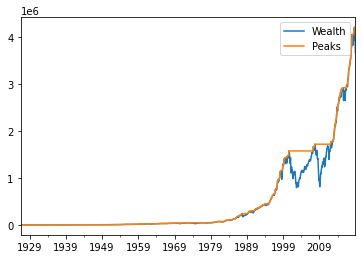

In [61]:
DD[["Wealth","Peaks"]].plot()

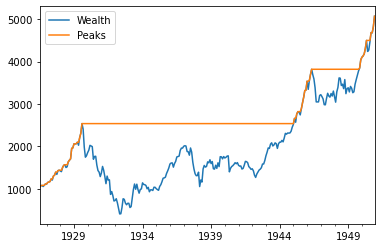

In [62]:
drawdown(returns[:"1950"]['LargeCap'])[["Wealth","Peaks"]].plot()

In [63]:
drawdown(returns['LargeCap'])["Drawdown"].min()

-0.8400375277943123

In [64]:
drawdown(returns['SmallCap'])["Drawdown"].min()

-0.8330007793945303

In [65]:
drawdown(returns['SmallCap'])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [66]:
drawdown(returns['LargeCap'])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [68]:
drawdown(returns["1940":]['SmallCap'])["Drawdown"].min()

-0.7000596091967917

In [69]:
drawdown(returns["1940":]['SmallCap'])["Drawdown"].idxmin()

Period('1974-12', 'M')

In [70]:
drawdown(returns["1975":]['SmallCap'])["Drawdown"].min()

-0.6312068077252386

In [71]:
drawdown(returns["1975":]['SmallCap'])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [72]:
drawdown(returns["1975":]['LargeCap'])["Drawdown"].min()

-0.5280945042309303

In [73]:
drawdown(returns["1975":]['LargeCap'])["Drawdown"].idxmin()

Period('2009-02', 'M')